# SPIN 1 - VL 04 -- Symplektische Integratoren

## Harmonische Oszillation

## Symplektische Integratoren - LeapFrog




In [3]:
def leapfrog_step(p,q,f,dt):
    fp = f[0]
    fq = f[1]
    q_half = q + 0.5 * dt * fq(p,q)
    p_new = p + dt * fp(p,q_half)
    q_new = q_half + 0.5 * dt * fq(p_new, q_half)
    return np.array([p_new, q_new])

### Harmonische Oszillation


In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def H1(p,q):
    return 0.5 * (p**2 + q**2)

def dH1q(p,q):
    return q

def dH1p(p,q):
    return p

def dpH1(p,q):
    return -dH1q(p,q)

def dqH1(p,q):
    return dH1p(p,q)


In [5]:
N = 200
dt = (2 * math.pi) / N

f = [dpH1,dqH1]
p0 = np.linspace(-10,10,10)
q0 = [0]*10  #np.linspace(10,0,10)

res = []
for p in range(0,len(q0)):
    pq = np.empty((N, 2))
    pq[0] = np.array([p0[p], q0[p]])
    for n in range(N-1):
        pq[n+1] = leapfrog_step(pq[n][0], pq[n][1], f, dt)
    res.append(pq)

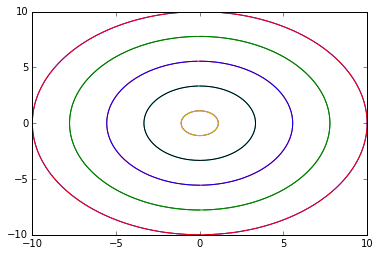

In [7]:
time = np.linspace(0.0, N*dt,N)
for r in res:
    p = [x[0] for x in r]
    q = [x[1] for x in r]

    plt.plot(q, p, '-')


### Pendel

In [27]:
e = 4

def H2(p,q):
    return 0.5 * p**2 + e * np.cos(q)
def dH2p(p,q):
    return p

def dH2q(p,q,):
    return -e * np.sin(q)

def dpH2(p,q):
    return -dH2q(p,q)

def dqH2(p,q):
    return dH2p(p,q)


In [82]:
N = 1000
dt = ( 8 * math.pi) / N

f = [dpH2,dqH2]
p0 = [1,3, 4.02, 5,7,9,1,3,-4.02, -5,-7,-9]#np.linspace(0,10,10) + np.linspace(0,10,10) 
q0 = [15.45, 15.45,  9.4, 9.4, 9.4, 9.4, 22.25, 22.25, 28, 28, 28, 28]


res = []

for p in range(0,len(q0)):
    pq = np.empty((N, 2))
    pq[0] = np.array([p0[p], q0[p]])
    for n in range(N-1):
        pq[n+1] = leapfrog_step(pq[n][0], pq[n][1], f, dt)
    res.append(pq)


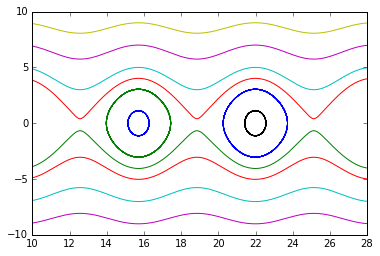

In [84]:
# time = np.linspace(0.0, N*dt,N)

for r in res:
    p = [x[0] for x in r]
    q = [x[1] for x in r]
    plt.xlim(10,28)
    plt.plot(q, p, '-')
